In [2]:
import torch
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

model = torch.hub.load("chenyaofo/pytorch-cifar-models", "cifar10_resnet20", pretrained=True)

# print out the model's structure
print(model)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

img = plt.imread("HEAAN/run/luis.png")

img = transform(img)

img = img.unsqueeze(0)

print(img.shape)

CifarResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias

Using cache found in /Users/aws/.cache/torch/hub/chenyaofo_pytorch-cifar-models_master


In [3]:
def precision(correct, approx):
    absolute = np.sum(np.abs(correct - approx)) / len(correct)
    relative = absolute / (np.sum(np.abs(correct)) / len(correct))
    return 1 - relative

In [5]:
def plot_error(actual, approx, bound=(-1.5, 1.5)):
    plt.plot(actual, linewidth=0.5)
    plt.plot(approx, linewidth=0.5)
    plt.gcf().set_size_inches(1.5 * plt.gcf().get_size_inches()[0], plt.gcf().get_size_inches()[1])
    err = approx - actual
    
    plt.figure()
    plt.hist(err, bins=100)
    plt.xlim(bound)
    plt.title("Distribution of Error")
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.show()

(3072,) (3072,)
0.9958353674838508


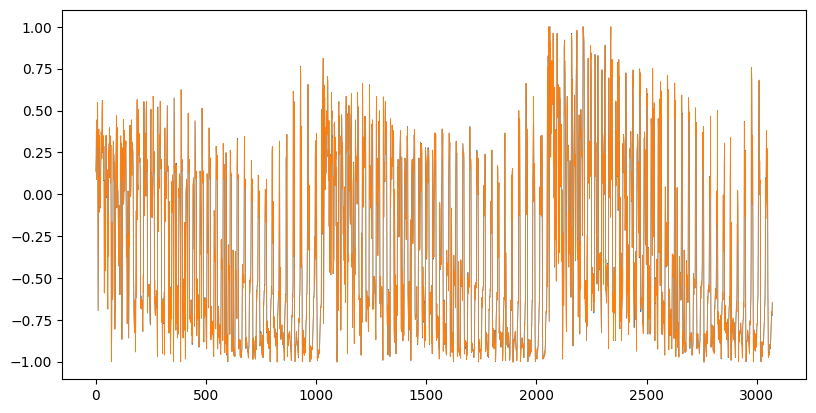

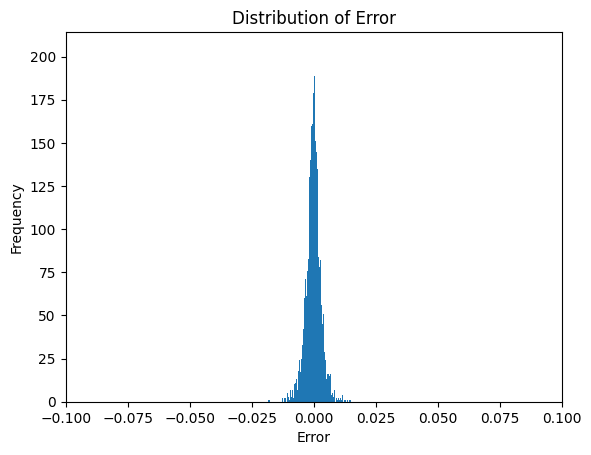

In [12]:
img_he = np.loadtxt("data/img.txt").reshape(-1)   
img0 = img.numpy().reshape(-1)

print(img_he.shape, img0.shape)
print(precision(img0, img_he))
plot_error(img0, img_he, (-0.1, 0.1))

[nan nan nan ... nan nan nan]
(16384,) (16384,)
nan


/Users/aws/Library/Python/3.9/lib/python/site-packages/matplotlib/axes/_axes.py:6973: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/Users/aws/Library/Python/3.9/lib/python/site-packages/matplotlib/axes/_axes.py:6974: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

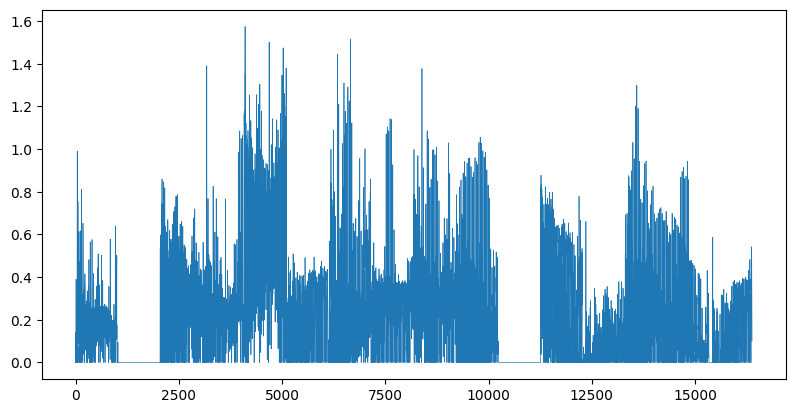

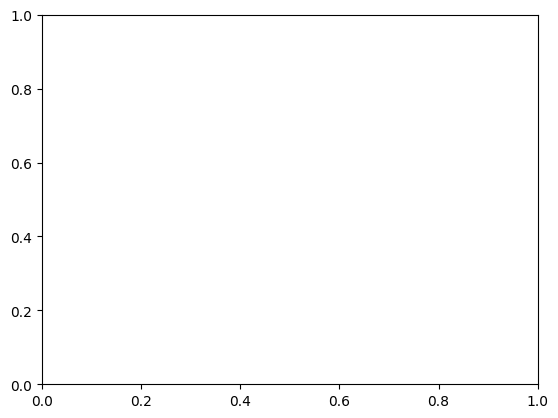

In [13]:
l0_he = np.loadtxt("data/Layer0.txt").reshape(-1)
l0 = model.relu(model.bn1(model.conv1(img))).reshape(-1).detach().numpy()

print(l0_he)    
# weight = model.bn1.weight.detach().numpy()
# bias = model.bn1.bias.detach().numpy()
# mean = model.bn1.running_mean.detach().numpy()
# var = model.bn1.running_var.detach().numpy()
# print(weight, bias, mean, var)

print(l0_he.shape, l0.shape)
print(precision(l0, l0_he))
plot_error(l0, l0_he)


(16384,) (16384,)
0.024152310786008213


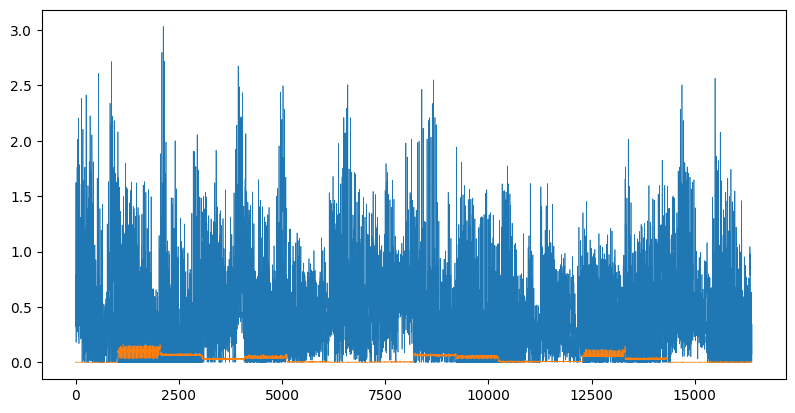

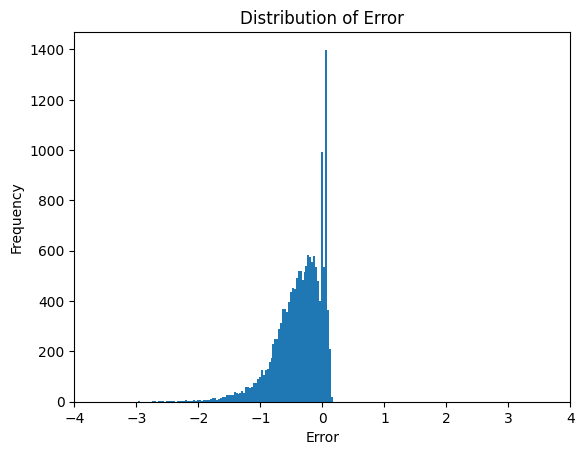

In [8]:
l1_he = np.loadtxt("data/Layer1.txt").reshape(-1)
l1 = model.layer1(model.relu(model.bn1(model.conv1(img)))).reshape(-1).detach().numpy()

print(l1_he.shape, l1.shape)
print(precision(l1, l1_he))
plot_error(l1, l1_he, (-4, 4))


(8192,) (8192,)
-0.3032617737475096


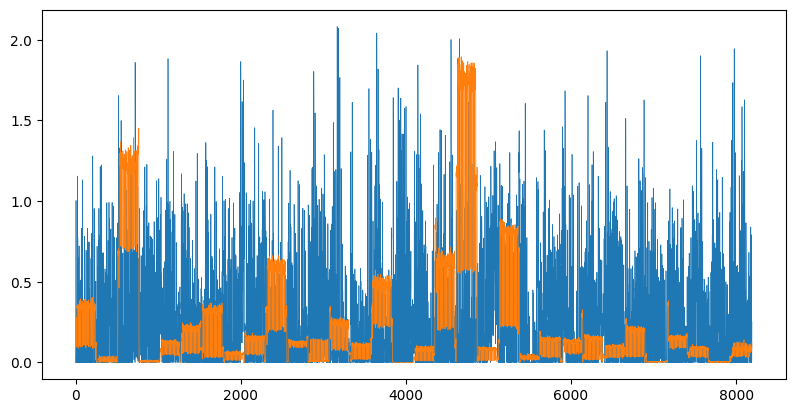

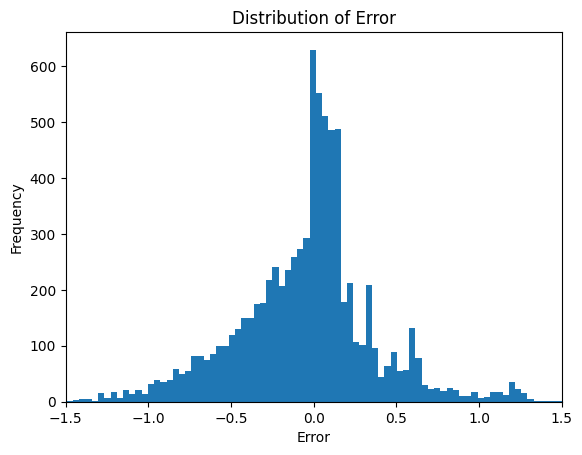

In [9]:
l2_he = np.loadtxt("data/Layer2.txt").reshape(-1)
l2 = model.layer2(model.layer1(model.relu(model.bn1(model.conv1(img))))).reshape(-1).detach().numpy()

print(l2_he.shape, l2.shape)
print(precision(l2, l2_he))
plot_error(l2, l2_he)

(4096,) (4096,)
-5.825502406826716


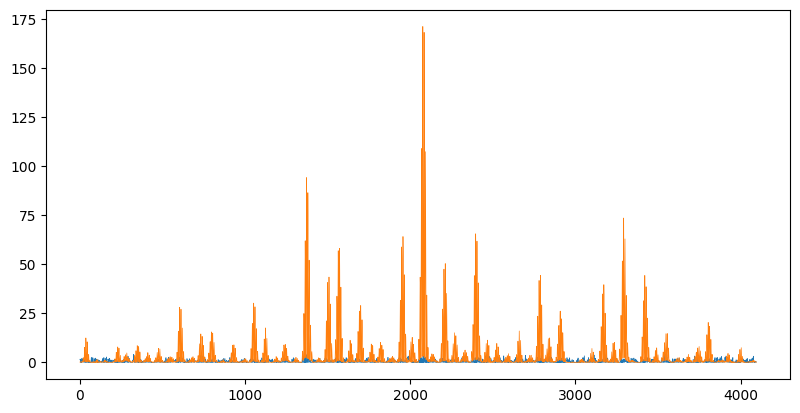

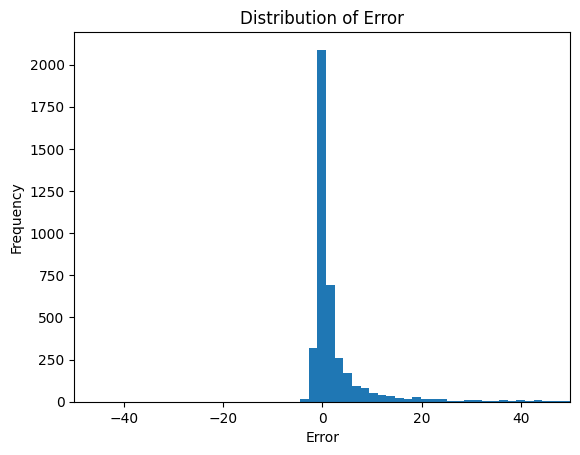

In [9]:
l3_he = np.loadtxt("data/Layer3.txt").reshape(-1)
l3 = model.layer3(model.layer2(model.layer1(model.relu(model.bn1(model.conv1(img)))))).reshape(-1).detach().numpy()

print(l3_he.shape, l3.shape)
print(precision(l3, l3_he))
plot_error(l3, l3_he, (-50, 50))

0.9850546605099106


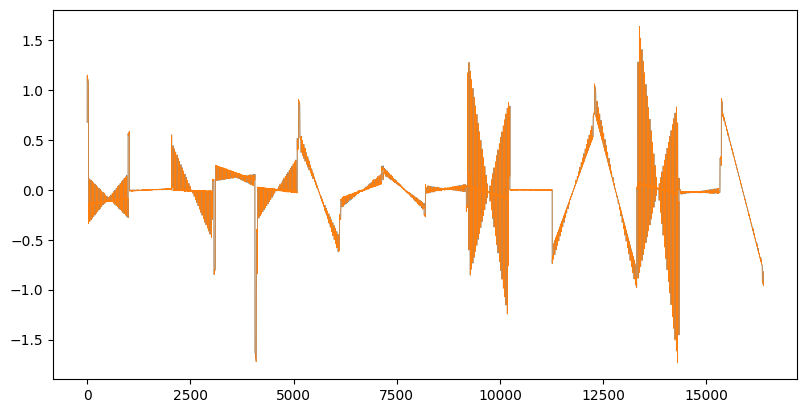

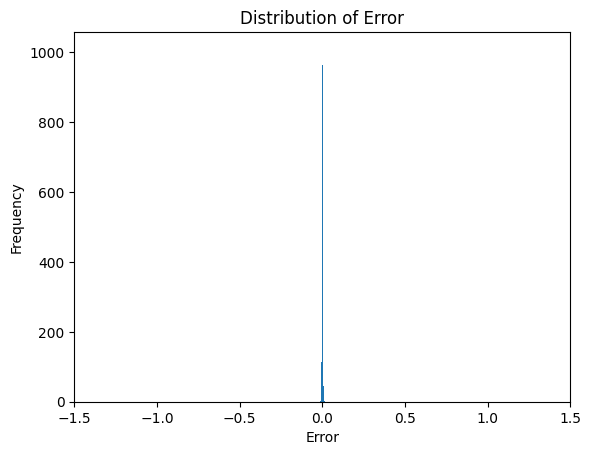

In [10]:
conv_he = np.loadtxt("data/conv2d.txt").reshape(-1)

input_tensor = torch.arange(1024, dtype=torch.float32).repeat(3).reshape(1, 3, 32, 32)

input_tensor = ((input_tensor / 1024) - 0.5) * 2

output_tensor = model.conv1(input_tensor)

conv_o = output_tensor.reshape(-1).detach().numpy()

print(precision(conv_o, conv_he))

plot_error(conv_o, conv_he)


0.9956755625248013


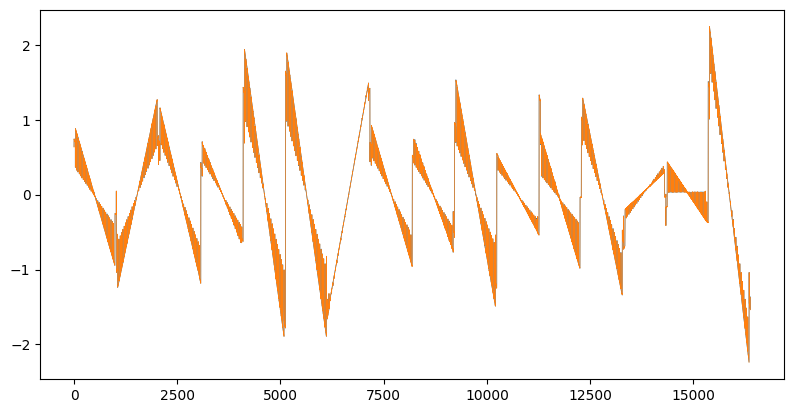

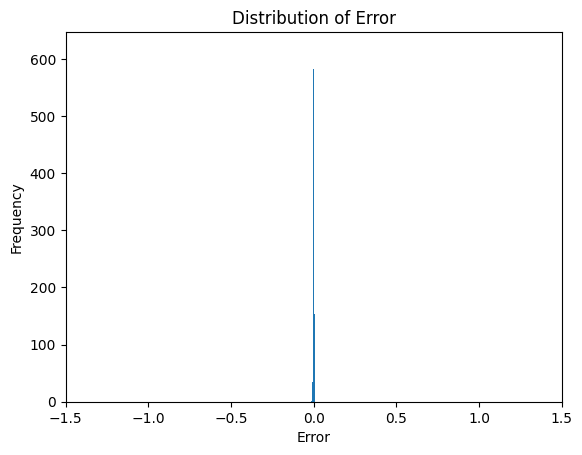

In [11]:
conv_he = np.loadtxt("data/conv2dfast.txt").reshape(-1)

input_tensor = torch.arange(1024, dtype=torch.float32).repeat(16).reshape(1, 16, 32, 32)

input_tensor = ((input_tensor / 1024) - 0.5) * 2

output_tensor = model.layer1[0].conv1(input_tensor)

conv_o = output_tensor.reshape(-1).detach().numpy()

print(precision(conv_o, conv_he))

plot_error(conv_o, conv_he)

0.8348212107612011


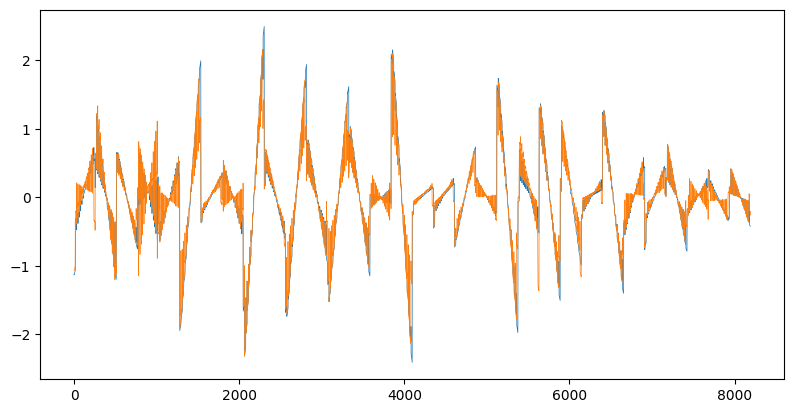

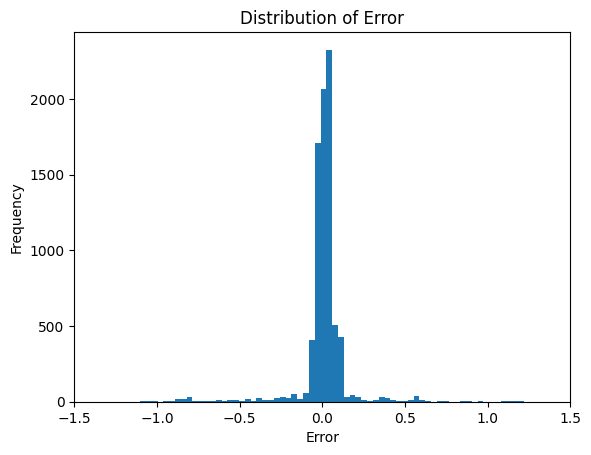

In [12]:
conv_he = np.loadtxt("data/conv2dfastdownsample.txt").reshape(-1)

input_tensor = torch.arange(1024, dtype=torch.float32).repeat(16).reshape(1, 16, 32, 32)

input_tensor = ((input_tensor / 1024) - 0.5) * 2

output_tensor = model.layer2[0].conv1(input_tensor)

conv_o = output_tensor.reshape(-1).detach().numpy()

print(precision(conv_o, 2 * conv_he))

plot_error(conv_o, 2 * conv_he)

0.6992237306867779


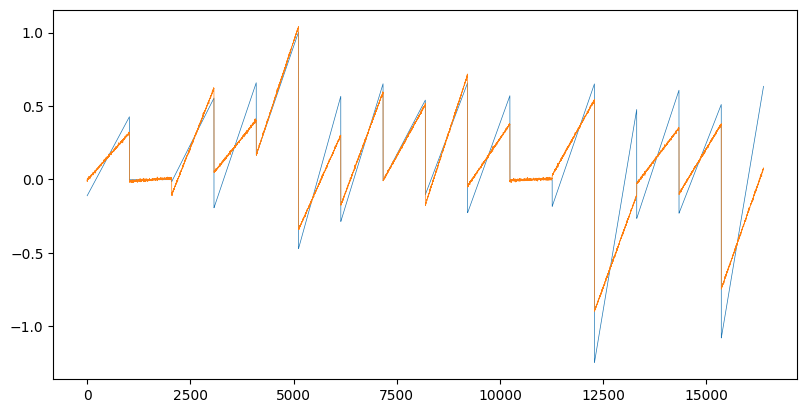

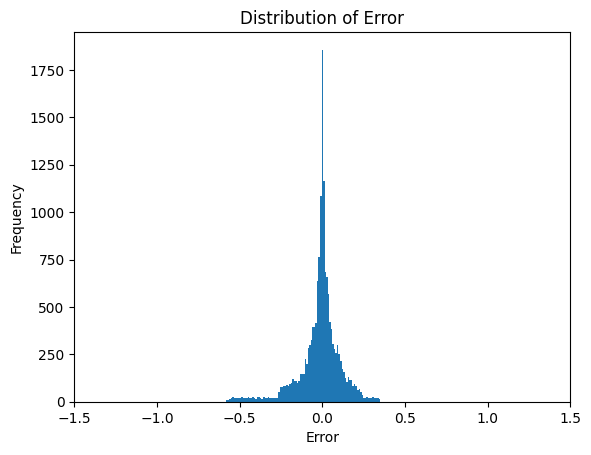

In [13]:
conv_he = np.loadtxt("data/bn.txt").reshape(-1)

input_tensor = torch.arange(1024, dtype=torch.float32).repeat(16).reshape(1, 16, 32, 32)

input_tensor = ((input_tensor / 1024) - 0.5) * 2

output_tensor = model.bn1(input_tensor)
# weight = model.bn1.weight
# bias = model.bn1.bias
# mean = model.bn1.running_mean
# var = model.bn1.running_var

# output_tensor = 0.66 * (input_tensor - mean.reshape(1, 16, 1, 1)) / torch.sqrt(var.reshape(1, 16, 1, 1) + 1e-5) * weight.reshape(1, 16, 1, 1) + bias.reshape(1, 16, 1, 1)

conv_o = output_tensor.reshape(-1).detach().numpy()

print(precision(conv_o, conv_he))

plot_error(conv_o, conv_he)

-0.003811011235322903


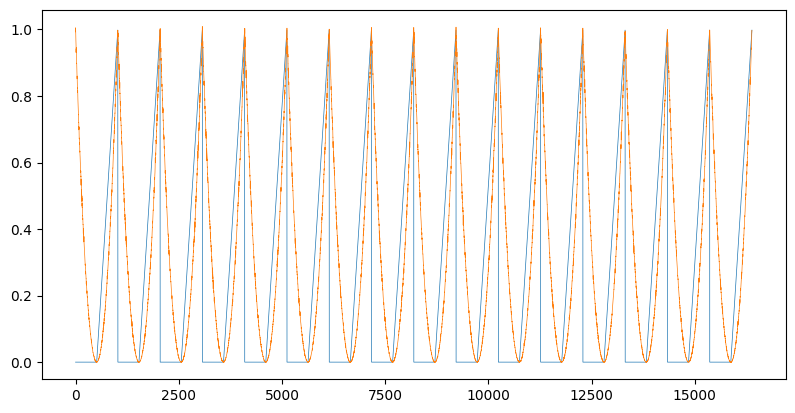

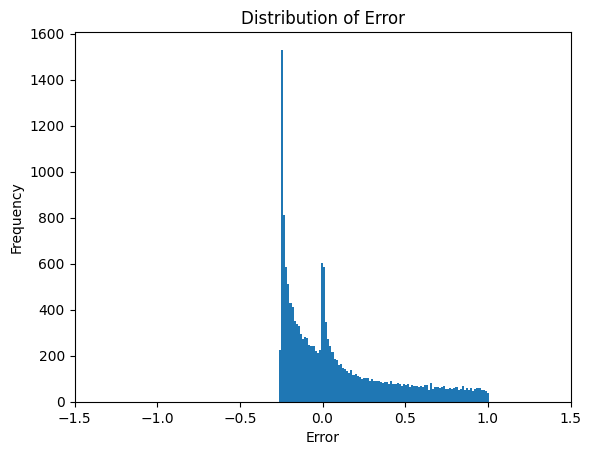

In [14]:
conv_he = np.loadtxt("data/relu.txt").reshape(-1)

input_tensor = torch.arange(1024, dtype=torch.float32).repeat(16).reshape(1, 16, 32, 32)

input_tensor = ((input_tensor / 1024) - 0.5) * 2

output_tensor = model.relu(input_tensor)

conv_o = output_tensor.reshape(-1).detach().numpy()

print(precision(conv_o, conv_he))

plot_error(conv_o, conv_he)

0.9470886107456736


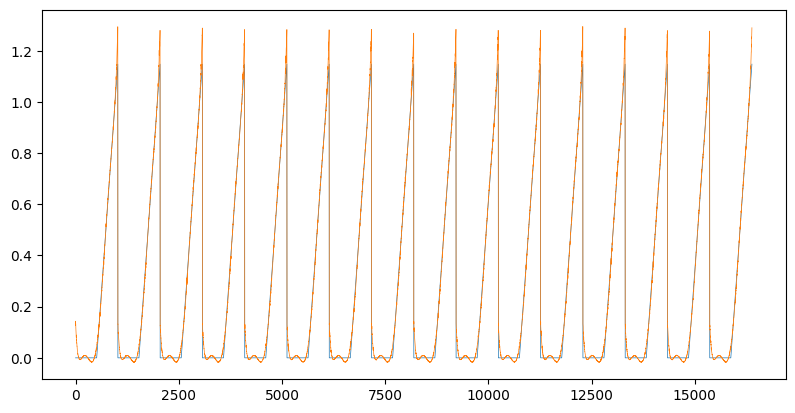

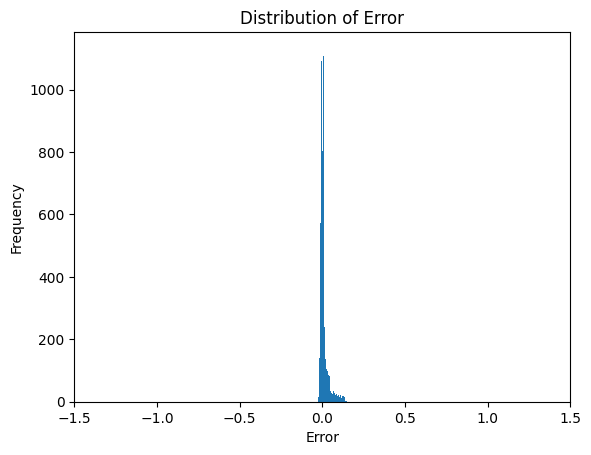

In [18]:
conv_he = np.loadtxt("data/relu1.txt").reshape(-1)

input_tensor = torch.arange(1024, dtype=torch.float32).repeat(16).reshape(1, 16, 32, 32)

input_tensor = ((input_tensor / 1024) - 0.5) * 2.3

output_tensor = model.relu(input_tensor)

conv_o = output_tensor.reshape(-1).detach().numpy()

print(precision(conv_o, conv_he))

plot_error(conv_o, conv_he)

0.9570478205739532


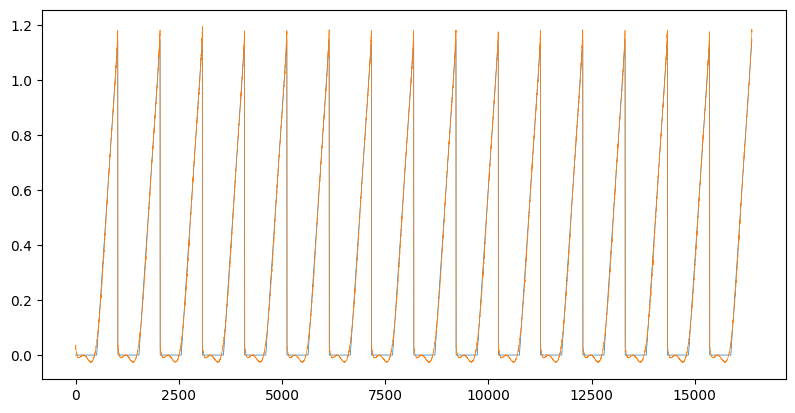

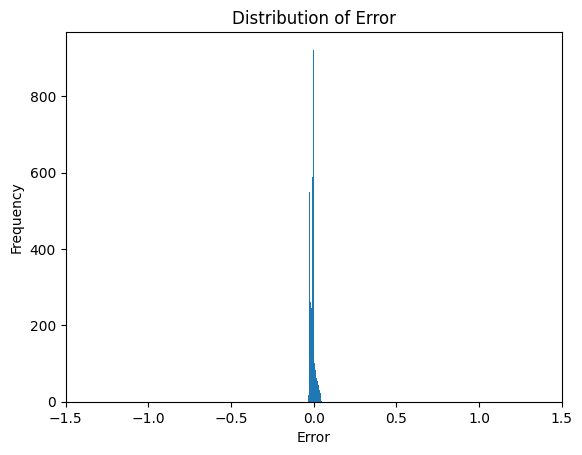

In [19]:
conv_he = np.loadtxt("data/relu2.txt").reshape(-1)

input_tensor = torch.arange(1024, dtype=torch.float32).repeat(16).reshape(1, 16, 32, 32)

input_tensor = ((input_tensor / 1024) - 0.5) * 2.3

output_tensor = model.relu(input_tensor)

conv_o = output_tensor.reshape(-1).detach().numpy()

print(precision(conv_o, conv_he))

plot_error(conv_o, conv_he)

0.999674691732363
[-1.         -0.93847656 -0.8769531  -0.8154297  -0.75390625 -0.6923828
 -0.6308594  -0.56933594 -0.5078125  -0.44628906 -0.38476562 -0.3232422
 -0.26171875 -0.20019531 -0.13867188 -0.07714844 -0.015625    0.04589844
  0.10742188  0.16894531  0.23046875  0.2919922   0.35351562  0.41503906
  0.4765625   0.53808594  0.5996094   0.6611328   0.72265625  0.7841797
  0.8457031   0.90722656  0.96875     1.0302734   1.0917969   1.1533203
  1.2148438   1.2763672   1.3378906   1.3994141   1.4609375   1.5224609
  1.5839844   1.6455078   1.7070312   1.7685547   1.8300781   1.8916016
  1.953125    2.0146484   2.0761719   2.1376953   2.1992188   2.2607422
  2.3222656   2.383789    2.4453125   2.506836    2.5683594   2.6298828
  2.6914062   2.7529297   2.8144531   2.8759766 ] [-1.0003125  -0.9384375  -0.8775     -0.81546875 -0.75453125 -0.69234375
 -0.6303125  -0.56875    -0.50734375 -0.4465625  -0.385625   -0.323125
 -0.26140625 -0.19953125 -0.13904687 -0.07728125 -0.01537031  0.04

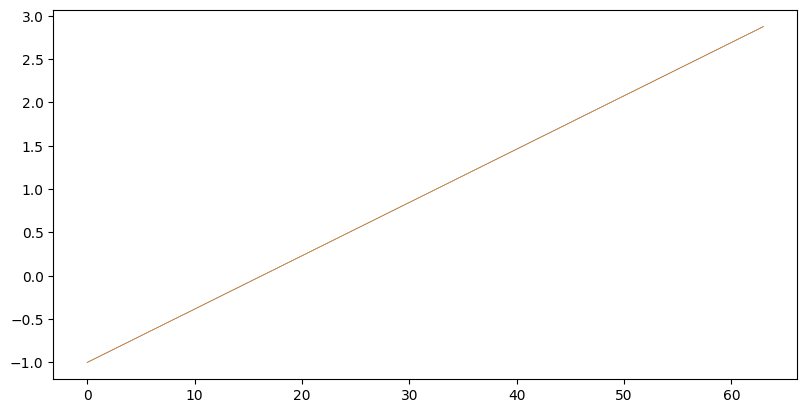

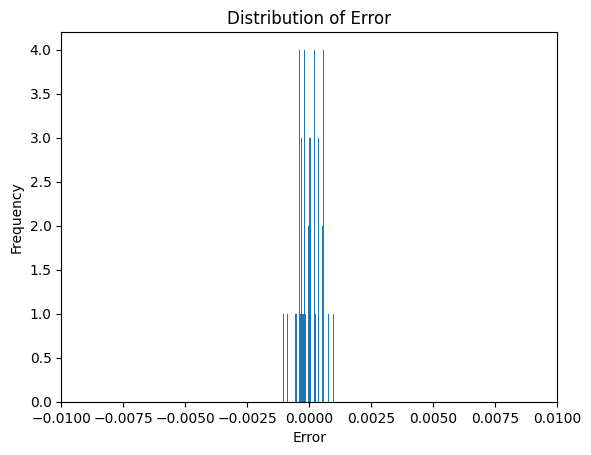

In [17]:
conv_he = np.loadtxt("data/pool.txt").reshape(-1)[0::64] / 64

input_tensor = torch.arange(64, dtype=torch.float32).repeat(64).reshape(1, 64, 8, 8)

input_tensor *= torch.arange(64, dtype=torch.float32).reshape(1, 64, 1, 1)

input_tensor = ((input_tensor / 1024) - 0.5) * 2

output_tensor = model.avgpool(input_tensor)

conv_o = output_tensor.reshape(-1).detach().numpy()

print(precision(conv_o, conv_he))

print(conv_o, conv_he)

plot_error(conv_o, conv_he, (-0.01, 0.01))

tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1.])
[-0.75446147  0.14859915  0.08407384 -0.74504244  0.5455054  -0.00379086
  0.438147    0.11893213  0.46916014 -0.30069178]
0.9515685830564455


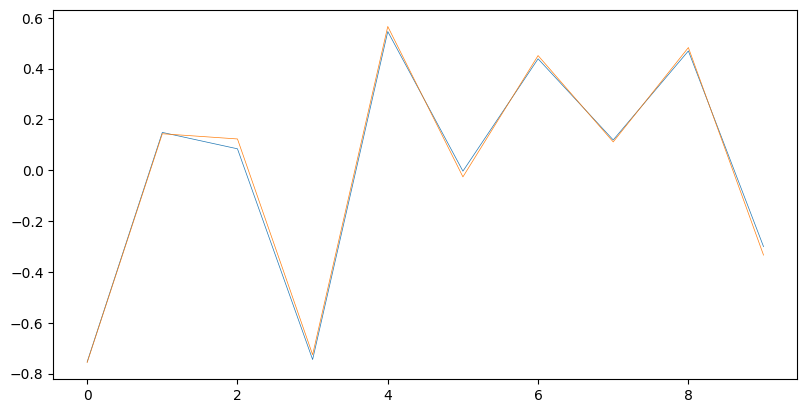

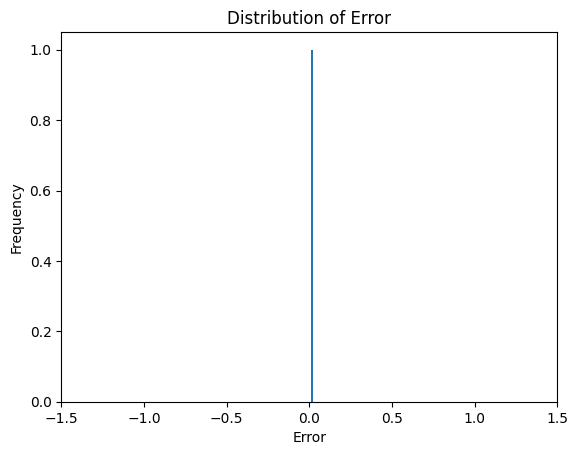

In [ ]:
fc = [-0.7565871, 0.14331096, 0.12283591, -0.7259899, 0.56537788, -0.026305549, 0.45088985, 0.11123841, 0.48245146, -0.33410844]

input_tensor = torch.arange(64, dtype=torch.float32).repeat(64).reshape(1, 64, 8, 8)

input_tensor *= torch.arange(64, dtype=torch.float32).reshape(1, 64, 1, 1)

input_tensor = ((input_tensor / 1024) - 0.5) * 2

input_tensor = input_tensor[0][:, 0, 0].reshape(64)

# print(input_tensor)

# Assuming the fully connected layer is named 'fc' in the model
weight = model.fc.weight.detach().numpy()

output_tensor = torch.matmul(input_tensor, torch.tensor(weight.T, dtype=torch.float32))

fc_o = output_tensor.reshape(-1).detach().numpy()

print(fc_o)

print(precision(fc_o, fc))

plot_error(fc_o, fc)